# Cancer Diagnostics

Using set of breast cancer data, create a model to predict breast cancer. Also, what traits are most indicative of whether or not an individual will be diagnosed?

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import time

In [2]:
data = pd.read_csv('Cancer_diagnostics_data_wisconsin.csv')
pd.options.display.max_columns = 50
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Data Set Information:

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

1. ID number
2. Diagnosis (M = malignant, B = benign)
Ten real-valued features are computed for each cell nucleus:

3. radius (mean of distances from center to points on the perimeter)
4. texture (standard deviation of gray-scale values)
5. perimeter
6. area
7. smoothness (local variation in radius lengths)
8. compactness (perimeter^2 / area - 1.0)
9. concavity (severity of concave portions of the contour)
10. concave points (number of concave portions of the contour)
11. symmetry
12. fractal dimension ("coastline approximation" - 1)

More information
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [3]:
# Check shape 
data.shape

(569, 33)

In [4]:
# Only Unnamed: 32 has NaN values which we will drop 
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

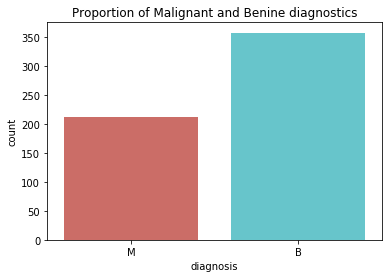

B    357
M    212
Name: diagnosis, dtype: int64


In [6]:
# visualize the difference and count each class 
sns.countplot(x='diagnosis', data=data, palette='hls')
plt.title('Proportion of Malignant and Benine diagnostics')
plt.show()
print(data['diagnosis'].value_counts())

In [7]:
# Drop unwanted cols
data.drop(['id','Unnamed: 32'],axis = 1,inplace = True)

In [8]:
# Check the unique values in target variable 
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [9]:
# Replace catagories with binry representations 
data['diagnosis'] = data.diagnosis.map(lambda x: 0 if x=='B' else 1)

In [10]:
# Confirm Changes
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Text(0.5,1,'Correlation')

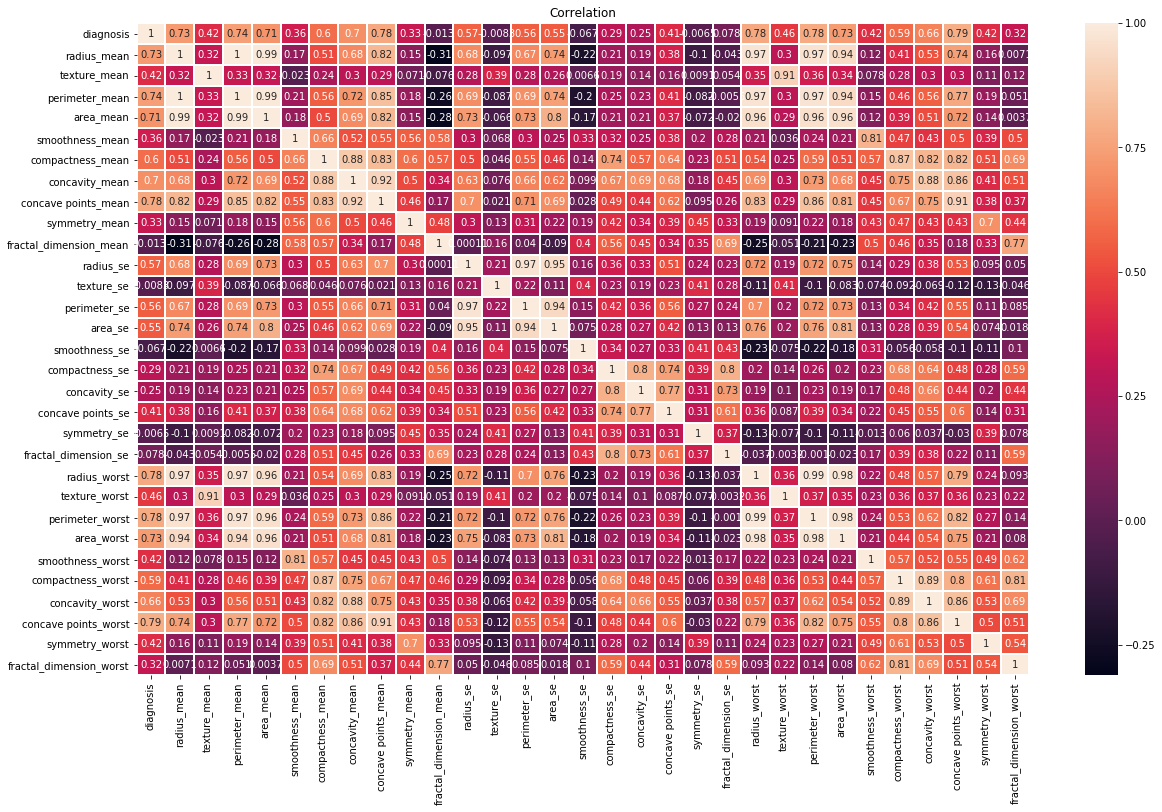

In [11]:
# Correlation heatmap 
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(),linewidth = 1,annot= True)
plt.title('Correlation')

In [12]:
# Drop some of the corelated variables
data.drop(['radius_worst', 'area_worst', 'texture_mean', 'smoothness_worst', 'concavity_mean', 'perimeter_worst', 'area_mean', 'perimeter_mean', 'area_se', 'perimeter_se', 'fractal_dimension_se', 'compactness_se', 
                       'compactness_worst', 'concave points_worst', 'compactness_mean', 'concave points_mean'], axis=1, inplace=True)

Correlation matrix after highly corelated features are removed

Text(0.5,1,'Correlation')

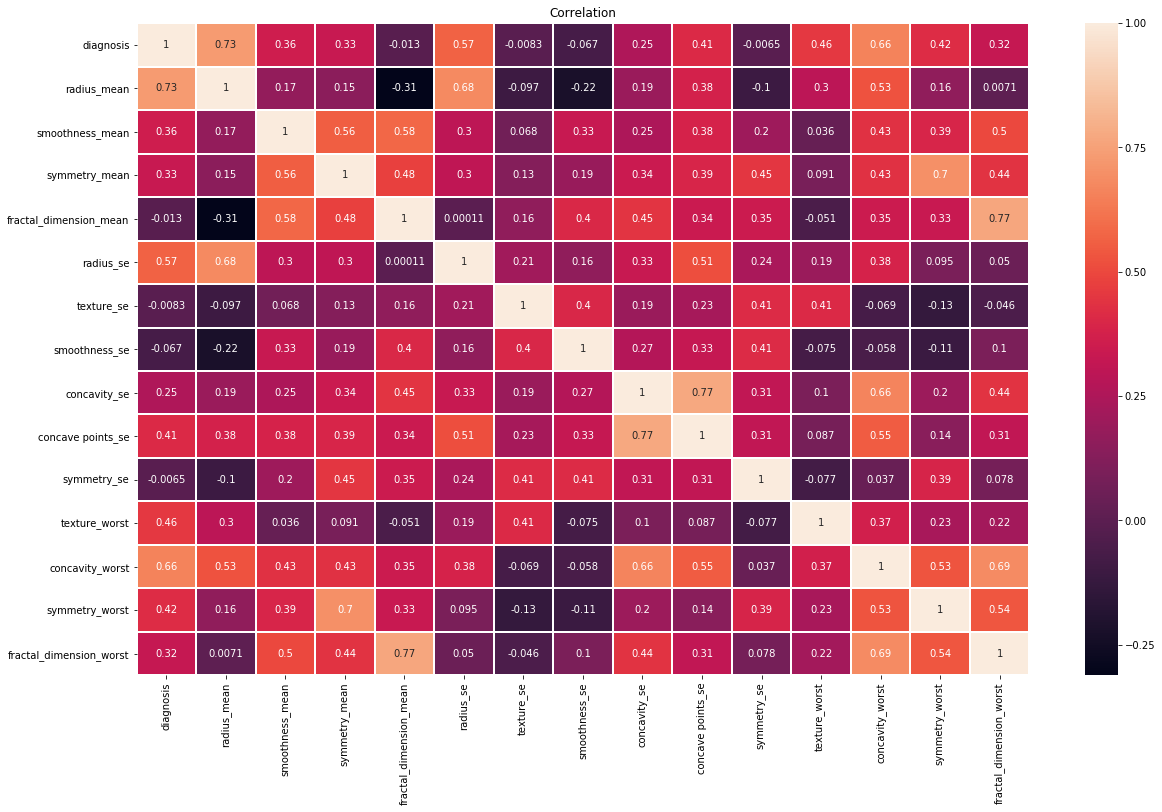

In [13]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(),linewidth = 1,annot= True)
plt.title('Correlation')

## Dimentionality reduction and feature selection using PCA and Select K Best

In [16]:
X = data.drop('diagnosis', 1)
Y = data['diagnosis']

In [17]:
# Predictors 
X.head()

,radius_mean,smoothness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,concavity_se,concave points_se,symmetry_se,texture_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,17.99,0.11840,0.2419,0.07871,1.0950,0.9053,0.006399,0.05373,0.01587,0.03003,17.33,0.7119,0.4601,0.11890
1,20.57,0.08474,0.1812,0.05667,0.5435,0.7339,0.005225,0.01860,0.01340,0.01389,23.41,0.2416,0.2750,0.08902
2,19.69,0.10960,0.2069,0.05999,0.7456,0.7869,0.006150,0.03832,0.02058,0.02250,25.53,0.4504,0.3613,0.08758
3,11.42,0.14250,0.2597,0.09744,0.4956,1.1560,0.009110,0.05661,0.01867,0.05963,26.50,0.6869,0.6638,0.17300
4,20.29,0.10030,0.1809,0.05883,0.7572,0.7813,0.011490,0.05688,0.01885,0.01756,16.67,0.4000,0.2364,0.07678


In [18]:
# Select 14 of the 24 features based on chi2 test
# This gave the best result after many trials
from sklearn.feature_selection import f_regression
selection = SelectKBest(score_func=f_regression, k=10)
X_kbest = selection.fit(X, Y).transform(X)

In [19]:
# standardize 
X_kbest_tra = StandardScaler().fit_transform(X_kbest)

In [20]:
# Initiate pca
pca =PCA(n_components=8)

In [21]:
# Fit with selected features
X_pca = pca.fit_transform(X_kbest_tra)

# Varience in pca
varience = pca.explained_variance_ratio_.cumsum()
print('Varience expained by principal components:', varience)

Varience expained by principal components: [0.42536884 0.5927954  0.7125929  0.81424985 0.87448419 0.92769366
 0.95751258 0.9759687 ]


In [22]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size = 0.3, random_state = 42)

## 1. KNN classifier

Training set score: 1.0

Test set score: 0.9298245614035088
Confusion matrix
[[104   4]
 [  8  55]]


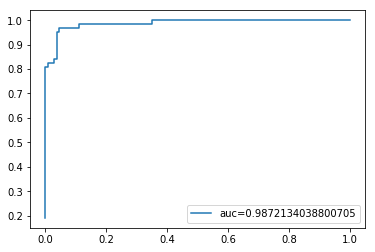

--- 0.14554758210030627 seconds ---


In [27]:
# Fit the data to knn model 
start_time = time.clock()
neigh = KNeighborsClassifier(n_neighbors=50, weights='distance')
neigh.fit(X_train, y_train)
y_knn = neigh.predict(X_test)

# score
print('Training set score:', neigh.score(X_train, y_train))
print('\nTest set score:', neigh.score(X_test, y_test))

#Confusion matrix 
print('Confusion matrix')
print(confusion_matrix(y_test, y_knn))

# AUC 
y_pred_proba = neigh.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='auc='+str(auc))
plt.legend(loc=4)
plt.show()
print("--- %s seconds ---" % (time.clock() - start_time))

In [41]:
print(classification_report(y_test, y_knn))

             precision    recall  f1-score   support

          0       0.93      0.96      0.95       108
          1       0.93      0.87      0.90        63

avg / total       0.93      0.93      0.93       171



The training set score and the gap to test set score is big suggesting potential overfitting. 

## 2. Decision tree

Training set score: 0.9773869346733668

Test set score: 0.9122807017543859
Confusion matrix
[[101   7]
 [  8  55]]
             precision    recall  f1-score   support

          0       0.93      0.94      0.93       108
          1       0.89      0.87      0.88        63

avg / total       0.91      0.91      0.91       171



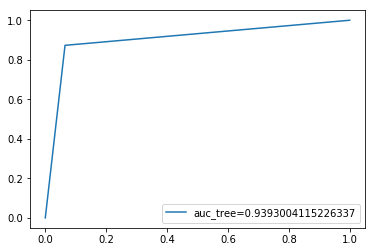

--- 1.4312146906516432 seconds ---


In [29]:
# Decision tree using GridSearchCV to tune parameters
start_time = time.clock()

tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150,500]}
tree = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=10)
grid_fit = tree.fit(X_train, y_train)

best_tree = grid_fit.best_estimator_
y_tree = best_tree.predict(X_test)

# Evaluations
print('Training set score:', best_tree.score(X_train, y_train))
print('\nTest set score:', best_tree.score(X_test, y_test))

#Confusion matrix for decision tree
print('Confusion matrix')
print(confusion_matrix(y_test, y_tree))

# Classification report 
print(classification_report(y_test, y_tree))

# AUC for decision tree classifier
y_tree_proba = tree.predict_proba(X_test)[::,1]
fpr_tree, tpr_tree, _ = metrics.roc_curve(y_test,  y_tree)
auc_tree = metrics.roc_auc_score(y_test, y_tree_proba)
plt.plot(fpr_tree,tpr_tree,label='auc_tree='+str(auc_tree))
plt.legend(loc=4)
plt.show()
print("--- %s seconds ---" % (time.clock() - start_time))

Higher accuracy score than KNN classifier and less overfitting 

## 3. Random Forest

Training set score: 0.9949748743718593

Test set score: 0.9239766081871345
Confusion matrix
[[102   6]
 [  7  56]]
             precision    recall  f1-score   support

          0       0.94      0.94      0.94       108
          1       0.90      0.89      0.90        63

avg / total       0.92      0.92      0.92       171



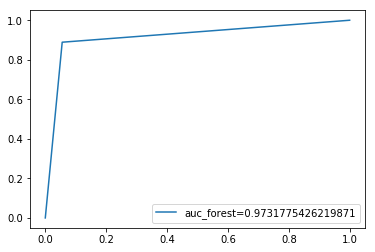

--- 7.9805725783776325 seconds ---


In [31]:
start_time = time.clock()
forest_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150, 200, 300, 500]}
forest = GridSearchCV(ensemble.RandomForestClassifier(), forest_para, cv=10)
grid_fit_forest = forest.fit(X_train, y_train)

best_forest = grid_fit_forest.best_estimator_
y_forest = best_forest.predict(X_test)

# Evaluations
print('Training set score:', best_forest.score(X_train, y_train))
print('\nTest set score:', best_forest.score(X_test, y_test))

#Confusion matrix for random forest
print('Confusion matrix')
print(confusion_matrix(y_test, y_forest))

# Classification report 
print(classification_report(y_test, y_forest))

# AUC for random forest classifier
y_forest_proba = forest.predict_proba(X_test)[::,1]
fpr_forest, tpr_forest, _ = metrics.roc_curve(y_test,  y_forest)
auc_forest = metrics.roc_auc_score(y_test, y_forest_proba)
plt.plot(fpr_forest,tpr_forest,label='auc_forest='+str(auc_forest))
plt.legend(loc=4)
plt.show()
print("--- %s seconds ---" % (time.clock() - start_time))

## 4. Logistics regression

Training set score: 0.9698492462311558

Test set score: 0.9649122807017544
Confusion matrix
[[105   3]
 [  3  60]]
             precision    recall  f1-score   support

          0       0.97      0.97      0.97       108
          1       0.95      0.95      0.95        63

avg / total       0.96      0.96      0.96       171



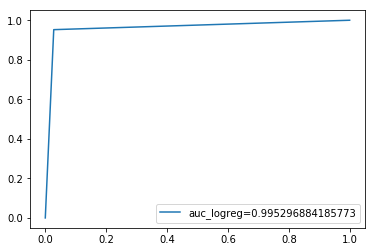

--- 45.840336571876946 seconds ---


In [32]:
# Binary classification using logistics 
start_time5 = time.clock()
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict using the test set
y_logreg = logreg.predict(X_test)

# Evaluations
print('Training set score:', logreg.score(X_train, y_train))
print('\nTest set score:', logreg.score(X_test, y_test))

#Confusion matrix for logistics regression classifier
print('Confusion matrix')
print(confusion_matrix(y_test, y_logreg))

# Classification report 
print(classification_report(y_test, y_logreg))

# AUC classifier
y_logreg_proba = logreg.predict_proba(X_test)[::,1]
fpr_logreg, tpr_logreg, _ = metrics.roc_curve(y_test,  y_logreg)
auc_logreg = metrics.roc_auc_score(y_test, y_logreg_proba)
plt.plot(fpr_logreg,tpr_logreg,label='auc_logreg='+str(auc_logreg))
plt.legend(loc=4)
plt.show()
print("--- %s seconds ---" % (time.clock() - start_time))

## 5. Ridge

In [33]:
# Ridge classifier
start_time = time.clock()
ridge = RidgeClassifier()
ridge.fit(X_train, y_train)

y_ridge = ridge.predict(X_test)

# Evaluations
print('Training set score:', ridge.score(X_train, y_train))
print('\nTest set score:', ridge.score(X_test, y_test))

#Confusion matrix for logistics regression classifier
print('Confusion matrix')
print(confusion_matrix(y_test, y_ridge))

# Classification report 
print(classification_report(y_test, y_ridge))
print("--- %s seconds ---" % (time.clock() - start_time))

Training set score: 0.957286432160804

Test set score: 0.9590643274853801
Confusion matrix
[[106   2]
 [  5  58]]
             precision    recall  f1-score   support

          0       0.95      0.98      0.97       108
          1       0.97      0.92      0.94        63

avg / total       0.96      0.96      0.96       171

--- 0.009893550887909441 seconds ---


## 6. Lasso 

Training set score: 0.9698492462311558

Test set score: 0.9649122807017544
Confusion matrix
[[105   3]
 [  3  60]]
             precision    recall  f1-score   support

          0       0.97      0.97      0.97       108
          1       0.95      0.95      0.95        63

avg / total       0.96      0.96      0.96       171



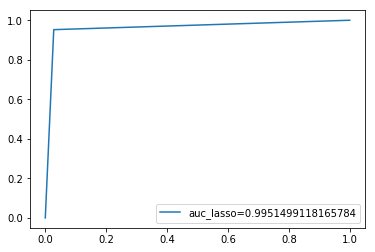

--- 0.11943599762594204 seconds ---


In [34]:
start_time = time.clock()
lasso = LogisticRegression(penalty='l1')
lasso.fit(X_train, y_train)

y_lasso = lasso.predict(X_test)

# Evaluations
print('Training set score:', lasso.score(X_train, y_train))
print('\nTest set score:', lasso.score(X_test, y_test))

#Confusion matrix for logistics regression classifier
print('Confusion matrix')
print(confusion_matrix(y_test, y_lasso))

# Classification report 
print(classification_report(y_test, y_lasso))

# AUC
y_lasso_proba = lasso.predict_proba(X_test)[::,1]
fpr_lasso, tpr_lasso, _ = metrics.roc_curve(y_test,  y_lasso)
auc_lasso = metrics.roc_auc_score(y_test, y_lasso_proba)
plt.plot(fpr_lasso,tpr_lasso,label='auc_lasso='+str(auc_lasso))
plt.legend(loc=4)
plt.show()
print("--- %s seconds ---" % (time.clock() - start_time))

## 7. SVM

Training set score: 0.9673366834170855

Test set score: 0.9649122807017544
Confusion matrix
[[105   3]
 [  3  60]]
             precision    recall  f1-score   support

          0       0.97      0.97      0.97       108
          1       0.95      0.95      0.95        63

avg / total       0.96      0.96      0.96       171



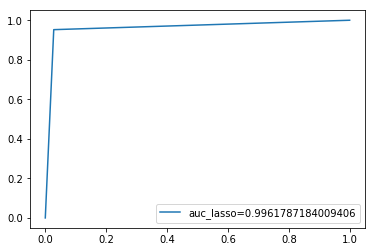

--- 1.8461166276764516 seconds ---


In [35]:
# Set the parameters by cross-validation
# reference http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
start_time = time.clock()
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['rbf'], 'C': [1, 10, 100, 500]}]
clf = GridSearchCV(SVC(probability=True), tuned_parameters, cv=10)
clf.fit(X_train, y_train)

clf.best_params_

#best_forest = grid_fit_forest.best_estimator_
y_svc = clf.predict(X_test)

# Evaluations
print('Training set score:', clf.score(X_train, y_train))
print('\nTest set score:', clf.score(X_test, y_test))

#Confusion matrix for logistics regression classifier
print('Confusion matrix')
print(confusion_matrix(y_test, y_svc))

# Classification report 
print(classification_report(y_test, y_svc))

# AUC
y_svc_proba = clf.predict_proba(X_test)[::,1]
fpr_clf, tpr_clf, _ = metrics.roc_curve(y_test,  y_svc)
auc_svc = metrics.roc_auc_score(y_test, y_svc_proba)
plt.plot(fpr_clf,tpr_clf,label='auc_lasso='+str(auc_svc))
plt.legend(loc=4)
plt.show()
print("--- %s seconds ---" % (time.clock() - start_time))

### 8. Gradient Boosti

{'learning_rate': [0.1, 0.05, 0.02, 0.01], 'max_depth': [4, 6, 8], 'min_samples_leaf': [20, 50, 100, 150]}
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   23.0s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:   31.3s
[Parallel(n_jobs=10)]: Done 240 out of 240 | elapsed:   43.2s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   23.0s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:   32.9s
[Parallel(n_jobs=10)]: Done 240 out of 240 | elapsed:   48.7s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   22.9s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:   32.9s
[Parallel(n_jobs=10)]: Done 240 out of 240 | elapsed:   48.8s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   23.3s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:   33.5s
[Parallel(n_jobs=10)]: Done 240 out of 240 | elapsed:   49.4s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   23.0s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:   33.1s
[Parallel(n_jobs=10)]: Done 240 out of 240 | elapsed:   49.0s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   22.9s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:   33.1s
[Parallel(n_jobs=10)]: Done 240 out of 240 | elapsed:   49.1s finished


[0.98158915 0.98869509 0.99932931 0.99027498 0.99597586]
Confusion matrix
[[104   4]
 [  5  58]]
             precision    recall  f1-score   support

          0       0.95      0.96      0.96       108
          1       0.94      0.92      0.93        63

avg / total       0.95      0.95      0.95       171



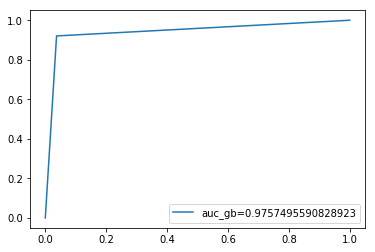

--- 294.3085569316463 seconds ---


In [38]:
start_time = time.clock()
gb_grid_params = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6, 8],
              'min_samples_leaf': [20, 50,100,150],
              #'max_features': [1.0, 0.3, 0.1] 
              }
print(gb_grid_params)

gb_gs = ensemble.GradientBoostingClassifier(n_estimators = 500)

gb_clf = GridSearchCV(gb_gs,
                   gb_grid_params,
                   cv=5,
                   scoring='roc_auc',
                   verbose = 3,
                   n_jobs=10);
gb_clf.fit(X_train, y_train)
predict_train = gb_clf.predict(X_train)
predict_test = gb_clf.predict(X_test)


# Evaluations
score_gb = cross_val_score(gb_clf, X, Y, cv=5)
print(score_gb)

#Confusion matrix for logistics regression classifier
print('Confusion matrix')
print(confusion_matrix(y_test, predict_test))

# Classification report 
print(classification_report(y_test, predict_test))

# AUC
y_gb_proba = gb_clf.predict_proba(X_test)[::,1]
fpr_gb, tpr_gb, _ = metrics.roc_curve(y_test,  predict_test)
auc_gb = metrics.roc_auc_score(y_test, y_gb_proba)
plt.plot(fpr_gb,tpr_gb,label='auc_gb='+str(auc_gb))
plt.legend(loc=4)
plt.show()

print("--- %s seconds ---" % (time.clock() - start_time))

In [39]:
score_gb.mean()

0.9911728770556152

All models performed with high accuracy. Logistics, lasso, and ridge regressions have improved the results from linear rgression by applying regularization paramerters. Any of those three plus SVM can be recommended models for this prediction. 